<a href="https://colab.research.google.com/github/dimasadhinugroho888/Analisis-Skor-Pola-Pangan-Harapan-PPH-Provinsi-di-Indonesia/blob/main/Analisis_Skor_Pola_Pangan_Harapan_(PPH)_Provinsi_di_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ANALISIS SKOR POLA PANGAN HARAPAN    
ERROR: File '1741238217.csv' tidak ditemukan. Mohon upload file tersebut terlebih dahulu.

## Ringkasan Data Awal
   No.        province  year  pph_score
0    1            Aceh  2018       72.7
1    2  Sumatera Utara  2018       84.8
2    3  Sumatera Barat  2018       81.2
3    4            Riau  2018       83.5
4    5           Jambi  2018       85.3
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        242 non-null    int64  
 1   province   242 non-null    object 
 2   year       242 non-null    int64  
 3   pph_score  242 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.7+ KB
None

✅ Data berhasil dimuat dan disiapkan. Tahun terbaru: 2024

## Analisis Skor PPH Provinsi Tahun 2024 (Data Terbaru)

### Statistik Deskriptif Skor PPH 2024:
    

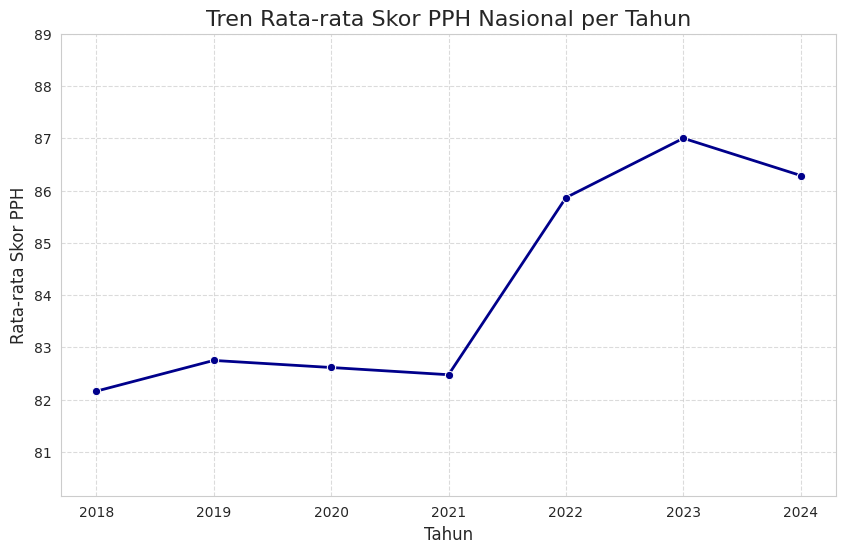


## Analisis Perubahan PPH: 2023 ke 2024
Rata-rata PPH Nasional 2023: 87.00
Rata-rata PPH Nasional 2024: 86.29
Perubahan (Kenaikan/Penurunan): -0.71


/tmp/ipython-input-2396366933.py:100: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




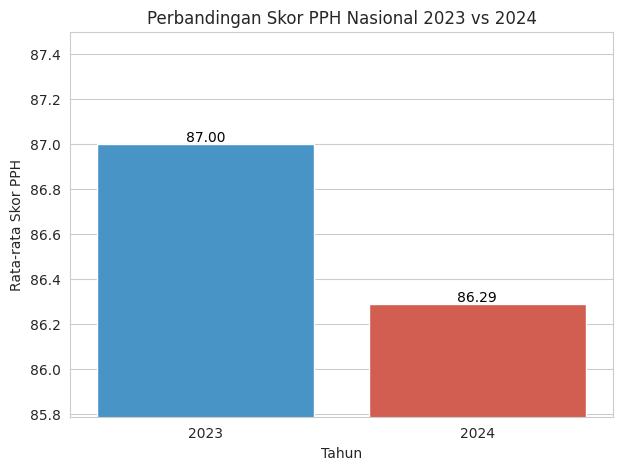


## Visualisasi Peringkat Skor PPH Provinsi Tahun 2024


/tmp/ipython-input-2396366933.py:124: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




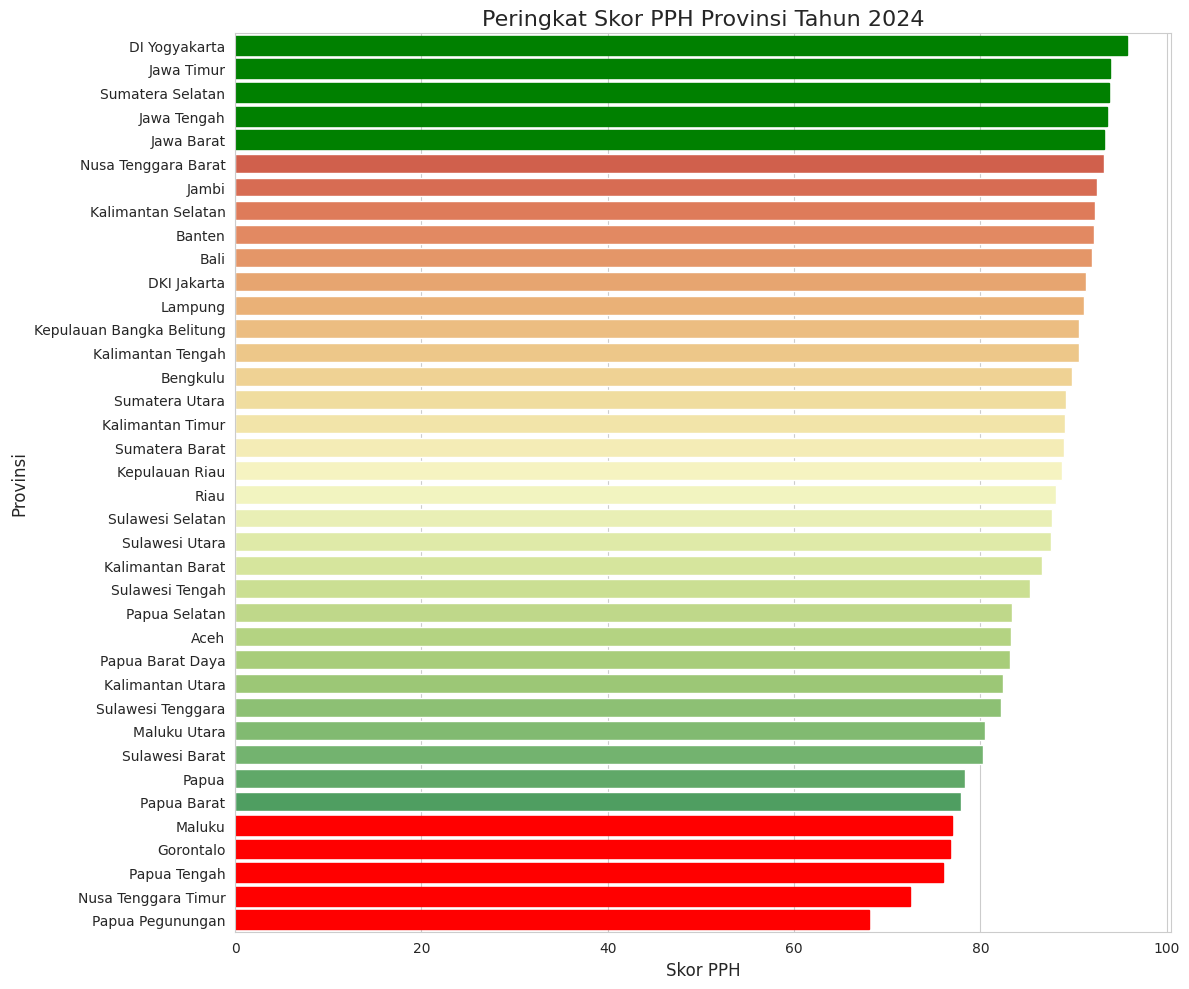

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set_style("whitegrid")

# --- Bagian 1: Pengaturan dan Pembersihan Data ---
print("==========================================")
print("     ANALISIS SKOR POLA PANGAN HARAPAN    ")
print("==========================================")

# 1. Memuat Dataset
# PASTIKAN FILE '1741238217.csv' SUDAH DI-UPLOAD KE GOOGLE COLAB
file_path = '1741238217.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' tidak ditemukan. Mohon upload file tersebut terlebih dahulu.")
    # Keluar dari skrip jika file tidak ditemukan
    exit()

# Menampilkan informasi awal data
print("\n## Ringkasan Data Awal")
print(df.head())
print("-" * 30)
print(df.info())

# 2. Pembersihan dan Persiapan Data
df.columns = ['No', 'Nama Provinsi', 'Tahun', 'Skor PPH'] # Ganti nama kolom agar lebih jelas
df = df.drop('No', axis=1) # Hapus kolom 'No' yang tidak relevan
df['Tahun'] = df['Tahun'].astype(int) # Pastikan kolom Tahun bertipe integer

# Tentukan Tahun terbaru
tahun_terbaru = df['Tahun'].max()
tahun_sebelumnya = tahun_terbaru - 1

print(f"\n✅ Data berhasil dimuat dan disiapkan. Tahun terbaru: {tahun_terbaru}")
print("="*50)

# --- Bagian 2: Analisis Detail Tahun 2024 ---
print(f"\n## Analisis Skor PPH Provinsi Tahun {tahun_terbaru} (Data Terbaru)")

df_2024 = df[df['Tahun'] == tahun_terbaru].copy()

# Statistik Deskriptif 2024
statistik_2024 = df_2024['Skor PPH'].describe().to_frame().T
print("\n### Statistik Deskriptif Skor PPH 2024:")
print(statistik_2024)

# 1. Provinsi Skor PPH Tertinggi
df_tertinggi = df_2024.sort_values(by='Skor PPH', ascending=False).head(5)
print(f"\n### 5 Provinsi dengan Skor PPH Tertinggi ({tahun_terbaru}):")
print(df_tertinggi[['Nama Provinsi', 'Skor PPH']].reset_index(drop=True))

# 2. Provinsi Skor PPH Terendah
df_terendah = df_2024.sort_values(by='Skor PPH', ascending=True).head(5)
print(f"\n### 5 Provinsi dengan Skor PPH Terendah ({tahun_terbaru}):")
print(df_terendah[['Nama Provinsi', 'Skor PPH']].reset_index(drop=True))

print("="*50)

# --- Bagian 3: Visualisasi Tren Nasional ---
print("\n## Tren Skor PPH Rata-rata Nasional (Historis)")

df_rata_rata_tahun = df.groupby('Tahun')['Skor PPH'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rata_rata_tahun, x='Tahun', y='Skor PPH', marker='o', color='darkblue', linewidth=2)
plt.title('Tren Rata-rata Skor PPH Nasional per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Skor PPH', fontsize=12)
plt.ylim(df_rata_rata_tahun['Skor PPH'].min() - 2, df_rata_rata_tahun['Skor PPH'].max() + 2) # Mengatur batas Y
plt.xticks(df_rata_rata_tahun['Tahun'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("="*50)

# --- Bagian 4: Analisis Perubahan Tahun ke Tahun (2023 vs 2024) ---
print(f"\n## Analisis Perubahan PPH: {tahun_sebelumnya} ke {tahun_terbaru}")

try:
    rata_rata_2024 = df_rata_rata_tahun[df_rata_rata_tahun['Tahun'] == tahun_terbaru]['Skor PPH'].iloc[0]
    rata_rata_2023 = df_rata_rata_tahun[df_rata_rata_tahun['Tahun'] == tahun_sebelumnya]['Skor PPH'].iloc[0]

    perubahan_pph = rata_rata_2024 - rata_rata_2023

    print(f"Rata-rata PPH Nasional {tahun_sebelumnya}: {rata_rata_2023:.2f}")
    print(f"Rata-rata PPH Nasional {tahun_terbaru}: {rata_rata_2024:.2f}")
    print(f"Perubahan (Kenaikan/Penurunan): {perubahan_pph:+.2f}")

    # Visualisasi Perbandingan 2023 vs 2024
    data_perubahan = pd.DataFrame({
        'Tahun': [str(tahun_sebelumnya), str(tahun_terbaru)],
        'Rata-rata Skor PPH': [rata_rata_2023, rata_rata_2024]
    })

    plt.figure(figsize=(7, 5))
    ax = sns.barplot(data=data_perubahan, x='Tahun', y='Rata-rata Skor PPH', palette=['#3498db', '#2ecc71' if perubahan_pph >= 0 else '#e74c3c'])
    plt.title(f'Perbandingan Skor PPH Nasional {tahun_sebelumnya} vs {tahun_terbaru}')
    plt.xlabel('Tahun')
    plt.ylabel('Rata-rata Skor PPH')
    plt.ylim(data_perubahan['Rata-rata Skor PPH'].min() - 0.5, data_perubahan['Rata-rata Skor PPH'].max() + 0.5)

    # Menambahkan label nilai di atas bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    plt.show()

except IndexError:
    print(f"Data untuk tahun {tahun_sebelumnya} tidak ditemukan. Tidak dapat menghitung perubahan.")

print("="*50)

# --- Bagian 5: Visualisasi Peringkat Provinsi 2024 ---
print(f"\n## Visualisasi Peringkat Skor PPH Provinsi Tahun {tahun_terbaru}")

# Mengurutkan data 2024 untuk visualisasi
df_2024_sorted = df_2024.sort_values(by='Skor PPH', ascending=False)

plt.figure(figsize=(12, 10))
ax = sns.barplot(data=df_2024_sorted, x='Skor PPH', y='Nama Provinsi', palette='RdYlGn')

plt.title(f'Peringkat Skor PPH Provinsi Tahun {tahun_terbaru}', fontsize=16)
plt.xlabel('Skor PPH', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)

# Memberi warna khusus pada 5 tertinggi (Hijau) dan 5 terendah (Merah)
for i, bar in enumerate(ax.patches):
    if i < 5:
        bar.set_color('green')
    elif i >= len(ax.patches) - 5:
        bar.set_color('red')

plt.tight_layout()
plt.show()